### Title: Real world Project with python- Udemy courses data analysis






* #### LinkedIn profile Link: [My LinkedIn Profile](https://www.linkedin.com/in/tamiriraishe-nyevera-2b51671b5/)


* #### Github Link:[Github profile](https://github.com/Tamie-AI-Tech)

* #### Kaggle Link: [Kaggle Profile](https://www.kaggle.com/tamiriraishenyevera)

* #### PowerBI visualisation imbedded code:[Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiNmU2Y2Q4OWUtZDE3MS00OTRhLThmZTgtODY3MTMyMzNiM2RiIiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)

#### Introduction

* Udemy is an online academy that offers online courses in different subjects musical instruments, web development at different levels, that is begginers, intermdidiate and adavanced. This dataset gives out the free courses and the paid also the good reviews. Published dates are also shown to give an update on the release date





* The data is a csv file and analysis is done using pandas 
* The data will be saved and exported to power bi for good visualisations
* matplotlib will be used for some data visualisations to get the inisghts of the data 

#### Questions to answer

These Questions will be answered under phase3: of the data analysis

* Which Courses are being offered by Udemy 
* What are subjects offered by udemy
* Show all courses that are free to coursera
* Which subject has the highest number of courses
* Show all Courses which are paid
* which courses with high subsribers
* Which are the least selling courses
* Show all courses of graphic design where price is below 100
* list all courses that are related to python
* What courses were released after 2015
* What are the maximum number of subscribers for each level of the course
* Which Month had the highest courses released
* Which days had the highest publications
* Which level had highest number of lectures
* Which subject had highest number of reviews

They will help in the story telling of in this data

# PHASE 1: PREPARE
    

This step involves data import,it includes import of libraries that facilitate data import, analysis and visualisation.


In [1]:
import pandas as pd               #for data loading and manipulation

import numpy as np                #for stastical analysis

import matplotlib.pyplot as plt        #for data visualisation
import seaborn as sns

import matplotlib
%matplotlib inline


In [2]:
na_vals = [' ', 'nan', 'Nan', 'NAN', 'naN', None]            #the list containing all the values that are to be deemed as null values
df = pd.read_csv('7. Udemy Courses.csv', na_values = na_vals)


#take note of the dataset directory, click on the dataset that needs to be imported and copy path or
#go to properties >> right click on the dataset >> security >> copy the path that shows beneath
#take note, on both cases insert r before the path directory.

#The other method inputting r doesnt matter
#import the dataset into the jupyter notebook folder you working on and copy the name of the dataset hence insert it in the parentheses

In [3]:
#view the dataset

df.head(2)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments


In [4]:
#check the shape of the dataset
df.shape

(3682, 11)

In [5]:
#view the columns of the dataset

df.columns.to_frame()

,0
course_id,course_id
course_title,course_title
is_paid,is_paid
price,price
num_subscribers,num_subscribers
num_reviews,num_reviews
num_lectures,num_lectures
level,level
content_duration,content_duration
published_timestamp,published_timestamp


In [6]:
#check the non null values in the dataset

df.count()

course_id              3682
course_title           3682
is_paid                3682
price                  3682
num_subscribers        3682
num_reviews            3682
num_lectures           3682
level                  3682
content_duration       3682
published_timestamp    3682
subject                3682
dtype: int64

# Phase 2: Data Processing

This phase includes all the cleaning, transforming and processing of data

### Step 1: Check for all the the missing or na values in the dataset

In [9]:
df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

There are no null values

### Step 2: Checking and handling the data duplicates

In [10]:
df.duplicated().sum()

6

there are 6 data duplicates, in the dataset

In [11]:
#drop or removing the data rows
df.drop_duplicates(inplace=True)

In [12]:
#check the duplicates again
df.duplicated().sum()

0

duplicates have now been cleared

### Step 3: Change the data types to more suitable format

In [13]:
df.dtypes

course_id               int64
course_title           object
is_paid                  bool
price                  object
num_subscribers         int64
num_reviews             int64
num_lectures            int64
level                  object
content_duration       object
published_timestamp    object
subject                object
dtype: object

In [14]:
#change the published column to datetime datatype

df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])



# Phase 3: Data Analysis

#### Question 1: Which Courses are being offered by Udemy 

In [15]:
df.head(1)              #take a look at the first row of the dataset

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments


In [16]:
df['course_title'].unique()

array(['#1 Piano Hand Coordination: Play 10th Ballad in Eb Key songs',
       '#10 Hand Coordination - Transfer Chord Ballad 9 - C & Bb Key',
       '#12 Hand Coordination: Let your Hands dance with Ballad 9', ...,
       'Zend Framework 2: Learn the PHP framework ZF2 from scratch',
       "Zoho Books Gestion Financière d'Entreprise pas à pas",
       'Zombie Apocalypse Photoshop Actions'], dtype=object)

#### Question 2: What  subjects is udemy offering 

In [17]:
df['subject'].unique()

array(['Musical Instruments', 'Business Finance', 'Graphic Design',
       'Web Development'], dtype=object)

#### Question 3: Show all courses that are free udemy

The question can be answered in 2 ways

In [18]:
filt = (df['price'] == 'Free')
df[filt]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
41,286070,5 lecciones que todo guitarrista debe tomar,False,Free,4452,263,14,Beginner Level,1 hour,2014-08-23 05:08:14+00:00,Musical Instruments
49,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,Free,4529,193,7,Beginner Level,36 mins,2015-12-21 18:50:50+00:00,Musical Instruments
57,955914,A beginner`s guide to fingerpicking and strumm...,False,Free,3481,29,20,Beginner Level,2 hours,2016-09-13 21:51:59+00:00,Musical Instruments
67,270976,A how to guide in HTML,False,Free,7318,205,8,Beginner Level,35 mins,2014-08-10 20:19:10+00:00,Web Development
74,1214144,¡Triunfar en La Bolsa de Valores No Requiere d...,False,Free,338,7,6,Beginner Level,1 hour,2017-05-30 14:30:12+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...
3620,552598,WordPress in under an hour - Create/manage you...,False,Free,6474,86,15,All Levels,1 hour,2015-07-15 00:21:56+00:00,Web Development
3638,1068590,Wordpress Website Mastery 2017,False,Free,5181,64,22,Beginner Level,2.5 hours,2017-01-18 17:01:40+00:00,Web Development
3652,752706,Write quicker HTML5 and CSS 3; productivity ha...,False,Free,13016,286,15,All Levels,1.5 hours,2016-03-03 17:45:31+00:00,Web Development
3674,1257976,Your First 10 Guitar Lessons - Learn how to pl...,False,Free,924,4,18,Beginner Level,1 hour,2017-06-29 00:29:36+00:00,Musical Instruments


second method

In [19]:
df[df['price'] == 'Free']

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
41,286070,5 lecciones que todo guitarrista debe tomar,False,Free,4452,263,14,Beginner Level,1 hour,2014-08-23 05:08:14+00:00,Musical Instruments
49,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,Free,4529,193,7,Beginner Level,36 mins,2015-12-21 18:50:50+00:00,Musical Instruments
57,955914,A beginner`s guide to fingerpicking and strumm...,False,Free,3481,29,20,Beginner Level,2 hours,2016-09-13 21:51:59+00:00,Musical Instruments
67,270976,A how to guide in HTML,False,Free,7318,205,8,Beginner Level,35 mins,2014-08-10 20:19:10+00:00,Web Development
74,1214144,¡Triunfar en La Bolsa de Valores No Requiere d...,False,Free,338,7,6,Beginner Level,1 hour,2017-05-30 14:30:12+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...
3620,552598,WordPress in under an hour - Create/manage you...,False,Free,6474,86,15,All Levels,1 hour,2015-07-15 00:21:56+00:00,Web Development
3638,1068590,Wordpress Website Mastery 2017,False,Free,5181,64,22,Beginner Level,2.5 hours,2017-01-18 17:01:40+00:00,Web Development
3652,752706,Write quicker HTML5 and CSS 3; productivity ha...,False,Free,13016,286,15,All Levels,1.5 hours,2016-03-03 17:45:31+00:00,Web Development
3674,1257976,Your First 10 Guitar Lessons - Learn how to pl...,False,Free,924,4,18,Beginner Level,1 hour,2017-06-29 00:29:36+00:00,Musical Instruments


310 courses are free on udemy

#### Question 4 : Which subject has the highest number of courses

In [20]:
df['subject'].value_counts()

Web Development        1199
Business Finance       1195
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

Web development has highest number of courses, the last being graphic design

#### Question 5: Show all courses which are paid

This question can be answered in two ways

In [21]:
#the first method
filt = (df['price'] != 'Free')
df[filt]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3676,498488,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2.5 hours,2015-05-26 20:48:48+00:00,Business Finance
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20 22:15:17+00:00,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26 20:04:21+00:00,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11 18:55:45+00:00,Web Development


In [22]:
#the second method
filt = (df['price'] == 'Free')
df[~filt]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3676,498488,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2.5 hours,2015-05-26 20:48:48+00:00,Business Finance
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20 22:15:17+00:00,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26 20:04:21+00:00,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11 18:55:45+00:00,Web Development


3366 courses are being paid on udemy

#### Question 5: Show all Courses which are paid

In [23]:
df.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments


In [24]:
df[df['is_paid'] == True]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3676,498488,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2.5 hours,2015-05-26 20:48:48+00:00,Business Finance
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20 22:15:17+00:00,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26 20:04:21+00:00,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11 18:55:45+00:00,Web Development


#### Question 6: which courses have highest numbe of subscribers

In [25]:
df.sort_values(by='num_subscribers', ascending= False)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2230,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14 07:03:41+00:00,Web Development
776,59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,3.5 hours,2013-06-09 15:51:55+00:00,Web Development
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02 21:13:27+00:00,Web Development
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,3 hours,2014-04-08 16:21:30+00:00,Web Development
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08 22:28:36+00:00,Web Development
...,...,...,...,...,...,...,...,...,...,...,...
403,1221942,Basic Bookkeeping,True,35,0,0,12,Beginner Level,44 mins,2017-05-23 16:20:18+00:00,Business Finance
2596,185526,MicroStation - Células,True,20,0,0,9,Beginner Level,37 mins,2014-04-15 21:48:55+00:00,Graphic Design
994,603902,Curso de Didgeridoo nivel principiante,True,50,0,0,31,Beginner Level,1 hour,2016-04-11 04:14:05+00:00,Musical Instruments
476,1252410,Beginners Guide to Kindle Ebook Covers Design ...,True,20,0,0,16,All Levels,1.5 hours,2017-06-19 19:26:46+00:00,Graphic Design


#### Question 7: Which are the least selling courses

In [26]:
df.sort_values(by='num_subscribers')

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2290,1223240,Learn Pirates of the Caribbean by Ear on the P...,True,20,0,0,6,All Levels,32 mins,2017-05-22 17:14:43+00:00,Musical Instruments
3261,1275872,The Complete Adobe Spark Course,True,150,0,0,29,All Levels,2 hours,2017-07-03 17:39:57+00:00,Graphic Design
491,1251582,Best Practices in Corporate Budgeting,True,50,0,0,9,Intermediate Level,2 hours,2017-06-29 22:01:56+00:00,Business Finance
484,1032648,beginning accounting,True,20,0,0,12,Intermediate Level,38 mins,2016-12-26 16:52:47+00:00,Business Finance
91,1265814,ABRSM Grade III Piano Class - Handel Sonatina ...,True,20,0,0,5,Beginner Level,31 mins,2017-07-06 16:12:34+00:00,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08 22:28:36+00:00,Web Development
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,3 hours,2014-04-08 16:21:30+00:00,Web Development
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02 21:13:27+00:00,Web Development
776,59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,3.5 hours,2013-06-09 15:51:55+00:00,Web Development


#### Question 8: Show all courses of graphic design where price is below 100

In [27]:
filt = (df['subject'] =='Graphic Design') & (df['price'] < '100')
df[filt]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject


This shows there is no a graphic design that is below 100 in terms of price

#### Question 9: list all courses that are related to python

In [28]:
filt = df['course_title'].str.contains('Python')
df[filt]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
216,599504,Advanced Scalable Python Web Development Using...,True,120,1299,56,71,Intermediate Level,14 hours,2016-08-11 22:09:24+00:00,Web Development
777,47963,"Coding for Entrepreneurs: Learn Python, Django...",True,195,23412,799,251,All Levels,45 hours,2013-04-08 00:46:14+00:00,Web Development
814,631128,Complete Python Web Course: Build 8 Python Web...,True,110,7489,941,173,All Levels,16 hours,2015-11-08 20:57:35+00:00,Web Development
842,186096,"Core: A Web App Reference Guide for Django, Py...",True,195,2497,98,154,All Levels,26 hours,2014-05-29 00:58:43+00:00,Web Development
1400,394832,Fun and creative web engineering with Python a...,False,Free,10917,319,25,All Levels,2 hours,2015-06-09 19:51:50+00:00,Web Development
1932,1038538,Introduction to QGIS Python Programming,True,85,197,26,28,Beginner Level,3.5 hours,2016-12-22 00:11:22+00:00,Web Development
1969,902888,Investment Portfolio Analysis with Python,True,50,209,13,37,All Levels,7 hours,2016-07-13 21:40:32+00:00,Business Finance
2294,391546,Learn Python and Django: Payment Processing,True,70,17714,198,23,All Levels,3.5 hours,2015-02-09 15:37:56+00:00,Web Development
2295,1063722,Learn Python Django - A Hands-On Course,True,50,1339,21,18,Beginner Level,2 hours,2017-01-18 21:53:34+00:00,Web Development
2341,546848,Learn to code in Python and learn Adobe Photos...,True,50,1132,1,29,All Levels,2 hours,2015-07-08 00:15:12+00:00,Graphic Design


#### Question 10: What courses were released after 2015

In [29]:
#create new columns containing the years, months and days
df['year_released'] = df['published_timestamp'].dt.year
df['month_released'] = df['published_timestamp'].dt.month
df['day_released'] = df['published_timestamp'].dt.day_name()

In [30]:
df.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year_released,month_released,day_released
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014,9,Thursday


However convert the months from numericals to months names

In [31]:
df['month_released'] = df['month_released'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct',
                                  11:'Nov', 12:'Dec'})

In [32]:
filt = (df['year_released'] > 2015)
df[filt]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year_released,month_released,day_released
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments,2017,Apr,Wednesday
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments,2017,Apr,Wednesday
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments,2017,Feb,Tuesday
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments,2017,Feb,Tuesday
5,1122832,#6 Piano Hand Coordination: Play Open 10 Balla...,True,65,2015,3,21,Intermediate Level,44 mins,2017-03-08 17:53:36+00:00,Musical Instruments,2017,Mar,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,968278,XSLT :basics for beginners,True,35,877,6,7,All Levels,32 mins,2016-09-27 15:14:59+00:00,Web Development,2016,Sep,Tuesday
3672,1031698,You Can Play Jazz Saxophone,True,20,37,7,6,Beginner Level,1.5 hours,2017-03-15 16:20:15+00:00,Musical Instruments,2017,Mar,Wednesday
3674,1257976,Your First 10 Guitar Lessons - Learn how to pl...,False,Free,924,4,18,Beginner Level,1 hour,2017-06-29 00:29:36+00:00,Musical Instruments,2017,Jun,Thursday
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,Free,229,0,33,All Levels,2 hours,2017-05-26 16:45:55+00:00,Business Finance,2017,May,Friday


#### Question 11: What are the maximum number of subscribers for each level of the course

In [33]:
df.groupby('level').num_subscribers.max()

level
All Levels            268923
Beginner Level        161029
Expert Level            5172
Intermediate Level     29167
Name: num_subscribers, dtype: int64

all levels has the highest number of subscribers as Expert level seals the list

#### Question 12: Which Month had the highest courses released

In [34]:
df['month_released'].value_counts().sort_values(ascending = False)

May    375
Mar    364
Apr    355
Jun    353
Feb    339
Nov    298
Jan    292
Oct    286
Jul    277
Aug    254
Dec    244
Sep    239
Name: month_released, dtype: int64

more courses were released in May, september had few courses courses released

#### Question 13: Which days had the highest publications

In [35]:
df['day_released'].value_counts()

Monday       735
Tuesday      694
Thursday     647
Wednesday    619
Friday       525
Sunday       279
Saturday     177
Name: day_released, dtype: int64

Monday was the highest day when courses were released

#### Question 14: Which level had highest number of lectures

In [36]:
df.groupby('level').num_lectures.max()

level
All Levels            544
Beginner Level        779
Expert Level          157
Intermediate Level    320
Name: num_lectures, dtype: int64

All levels had highest number of lectures being 544 the least being intermediate level with 320

#### Question 15: Which subject had highest number of reviews

In [37]:
df.groupby('subject').num_reviews.max()

subject
Business Finance        4397
Graphic Design          2379
Musical Instruments     7676
Web Development        27445
Name: num_reviews, dtype: int64

Business Finace had the highest number of reviews being 4397

In [38]:
#view the dataset
df.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year_released,month_released,day_released
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014,Sep,Thursday


In [39]:
#df.to_csv(r'C:\Users\user\Downloads\power bi\cleaned_datasets\Udemy_courses.csv')

# Phase 4: Data Visualisation

* The purpose of data visualization is to visually represent data in a way that allows people to quickly and easily understand patterns, relationships, and trends in the data. By creating visual representations of data, we can make complex information more accessible and understandable, which can lead to insights and actionable outcomes.


### 4.1: Subject Distribution

<AxesSubplot:title={'center':'Subject Distribution'}>

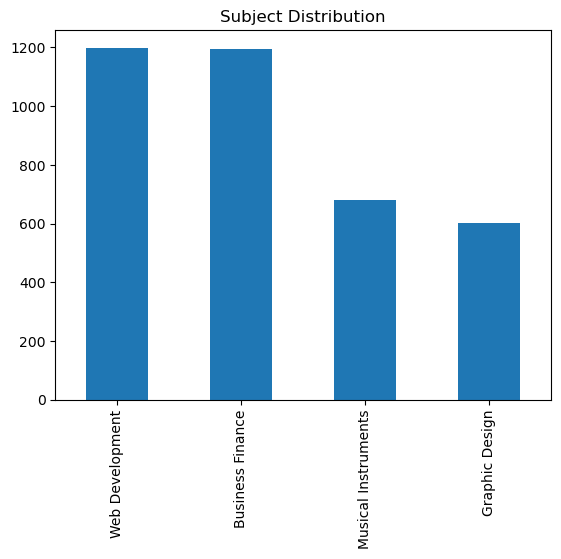

In [41]:
unique_subjects = df['subject'].unique()

unique_subjects_counts = df['subject'].value_counts()

unique_subjects_counts.plot(kind='bar', title='Subject Distribution')

##### * **key takeaway:**  web developments and business finance had more sbjects contributions

### 4.2: Courses Released by Day of the Week

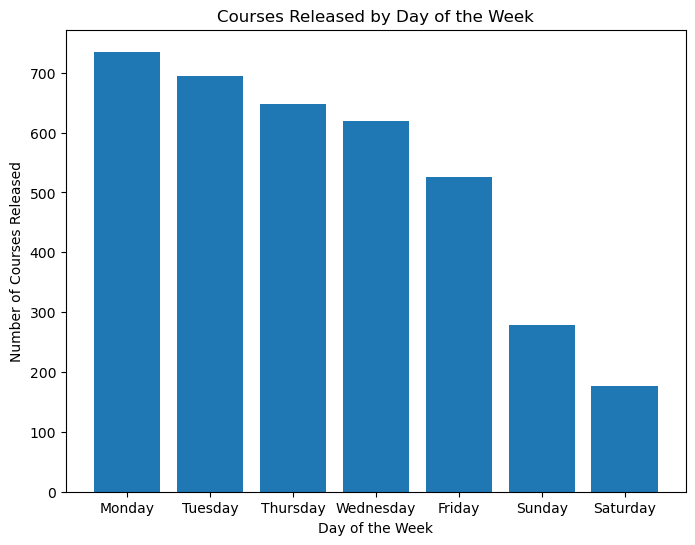

In [44]:
day_counts = df['day_released'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(day_counts.index, day_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Courses Released')
plt.title('Courses Released by Day of the Week')
plt.show()


##### * **key takeaway:**  more courses were released on mondays

### 4.3: Courses Released by Month

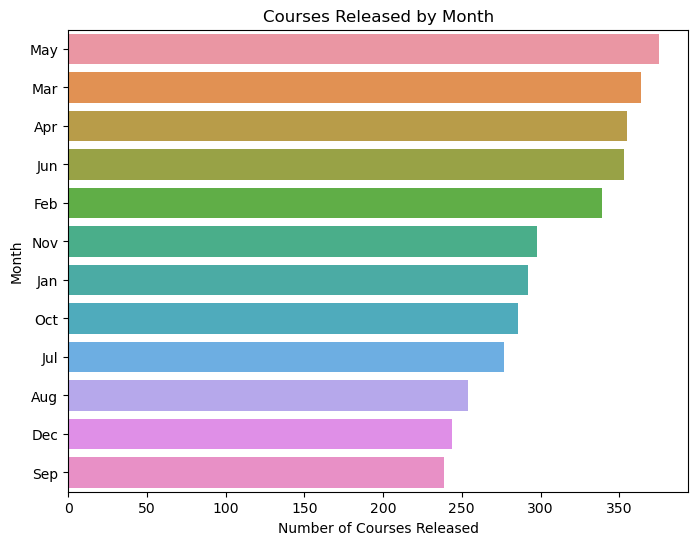

In [45]:

month_counts = df['month_released'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=month_counts.values, y=month_counts.index)
plt.xlabel('Number of Courses Released')
plt.ylabel('Month')
plt.title('Courses Released by Month')
plt.show()


##### * **key takeaway:**  may had more courses released

### 4.4: Maximum Number of Lectures by Level

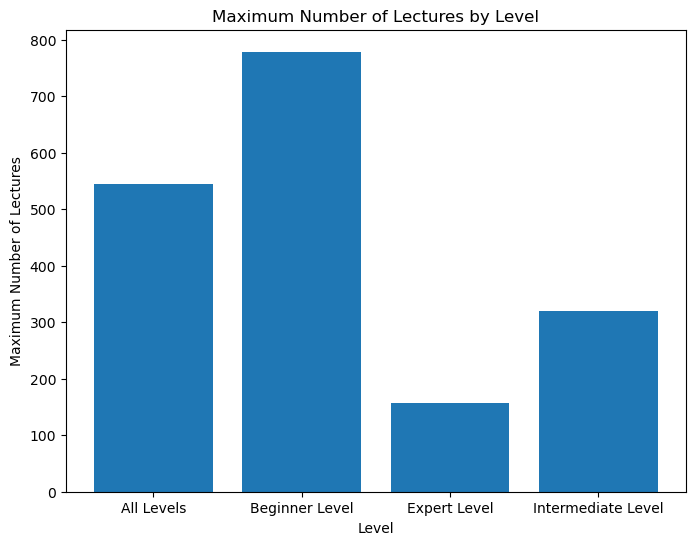

In [8]:


max_lectures = df.groupby('level').num_lectures.max()

plt.figure(figsize=(8, 6))
plt.bar(max_lectures.index, max_lectures.values)
plt.xlabel('Level')
plt.ylabel('Maximum Number of Lectures')
plt.title('Maximum Number of Lectures by Level')
plt.show()


##### * **key takeaway:**  udemy has released more beginner level than than all level

### 4.5: Maximum Number of Subscribers by Level

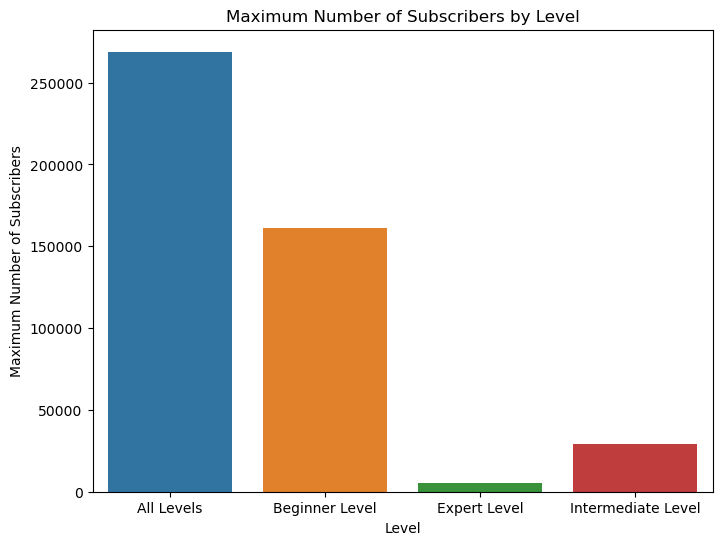

In [47]:


max_subscribers = df.groupby('level').num_subscribers.max()

plt.figure(figsize=(8, 6))
sns.barplot(x=max_subscribers.index, y=max_subscribers.values)
plt.xlabel('Level')
plt.ylabel('Maximum Number of Subscribers')
plt.title('Maximum Number of Subscribers by Level')
plt.show()


##### * **key takeaway:**  all levels had more subscribers in the least being expert level

In [7]:
#saving the dataset for more vizualisation
df.to_csv(r"C:\Users\Tamie\Downloads\python data science projects\datasets\udemy Cars")

#### Further data Visualization was done in powerbi:[Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiNmU2Y2Q4OWUtZDE3MS00OTRhLThmZTgtODY3MTMyMzNiM2RiIiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)

## Author: TamiriraIshe Nyevera

## Date: 3 January 2023

* #### LinkedIn profile Link: [My LinkedIn Profile](https://www.linkedin.com/in/tamiriraishe-nyevera-2b51671b5/)

* #### Github link:[Github profile](https://github.com/Tamie-AI-Tech)

* #### Kaggle Link: [Kaggle Profile](https://www.kaggle.com/tamiriraishenyevera)

* #### PowerBI visualisation imbedded code:[Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiNmU2Y2Q4OWUtZDE3MS00OTRhLThmZTgtODY3MTMyMzNiM2RiIiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)